In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/super-market-dataset/Sample - Superstore.csv
/kaggle/input/super-market-dataset/Sample - Superstore.xls
/kaggle/input/returns/Returns.csv


# Understanding the data

Importing the CSV file containing data to a dataframe named as df

In [2]:
df = pd.read_csv('/kaggle/input/super-market-dataset/Sample - Superstore.csv')

In [3]:
#Understanding the top 10 rows
df.head(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2021-103800,03-01-2021,07-01-2021,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2021-112326,04-01-2021,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2021-112326,04-01-2021,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2021-112326,04-01-2021,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2021-141817,05-01-2021,12-01-2021,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [4]:
#total observations
df.shape

(10194, 21)

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State/Province', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
#Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          10194 non-null  int64  
 1   Order ID        10194 non-null  object 
 2   Order Date      10194 non-null  object 
 3   Ship Date       10194 non-null  object 
 4   Ship Mode       10194 non-null  object 
 5   Customer ID     10194 non-null  object 
 6   Customer Name   10194 non-null  object 
 7   Segment         10194 non-null  object 
 8   Country/Region  10194 non-null  object 
 9   City            10194 non-null  object 
 10  State/Province  10194 non-null  object 
 11  Postal Code     10194 non-null  object 
 12  Region          10194 non-null  object 
 13  Product ID      10194 non-null  object 
 14  Category        10194 non-null  object 
 15  Sub-Category    10194 non-null  object 
 16  Product Name    10194 non-null  object 
 17  Sales           10194 non-null 


**It is observed that data has no null value but data type for order and ship date has to be changed to datatime**


In [7]:
#Converting order and ship date to datetime with DD-MM-YYYY
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%d-%m-%Y')
df[['Order Date','Ship Date']].dtypes

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

# Adding key matrix

**Based on the data it is observed that there is need to add some more features to the data:**
1) Processing time in days (Ship date - order date)
2) total cost and margin for each order

In [8]:
#Incorporating process time
df['Pross time'] = (df['Ship Date']-df['Order Date']).dt.days
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Pross time
0,1,US-2021-103800,2021-01-03,2021-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,4


In [9]:
#Cost
df['Cost'] = df['Sales'] - df['Profit']

#Profit margin
df['Profit_m'] = round((df['Profit']/df['Sales']*100),2)

df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Pross time,Cost,Profit_m
0,1,US-2021-103800,2021-01-03,2021-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,4,10.8968,33.75
1,2,US-2021-112326,2021-01-04,2021-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,4,9.0270,-155.00
2,3,US-2021-112326,2021-01-04,2021-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,4,7.5123,36.25
3,4,US-2021-112326,2021-01-04,2021-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,4,337.5108,-23.75
4,5,US-2021-141817,2021-01-05,2021-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,7,14.6520,25.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          10194 non-null  int64         
 1   Order ID        10194 non-null  object        
 2   Order Date      10194 non-null  datetime64[ns]
 3   Ship Date       10194 non-null  datetime64[ns]
 4   Ship Mode       10194 non-null  object        
 5   Customer ID     10194 non-null  object        
 6   Customer Name   10194 non-null  object        
 7   Segment         10194 non-null  object        
 8   Country/Region  10194 non-null  object        
 9   City            10194 non-null  object        
 10  State/Province  10194 non-null  object        
 11  Postal Code     10194 non-null  object        
 12  Region          10194 non-null  object        
 13  Product ID      10194 non-null  object        
 14  Category        10194 non-null  object        
 15  Su

# Univariate analysis

In [11]:
#Count the unique values associated with all rows
df.nunique()

Row ID            10194
Order ID           5111
Order Date         1242
Ship Date          1338
Ship Mode             4
Customer ID         804
Customer Name       800
Segment               3
Country/Region        2
City                542
State/Province       59
Postal Code         654
Region                4
Product ID         1862
Category              3
Sub-Category         17
Product Name       1849
Sales              5837
Quantity             14
Discount             12
Profit             7334
Pross time           10
Cost               6678
Profit_m            313
dtype: int64

Key inferences:
* Row ID is primary key
* Order IDs are less then total rows because there may be multiple products associated with single order
* There are 4 shiping modes available
* There are 4 customers with same name
* Total products are 1862 

**Categorical feautures**

In [12]:
df['Ship Mode'].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

In [13]:
df['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [14]:
df['Country/Region'].unique()

array(['United States', 'Canada'], dtype=object)

In [15]:
df['Region'].unique()

array(['Central', 'East', 'South', 'West'], dtype=object)

In [16]:
df['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [17]:
df['Sub-Category'].unique()

array(['Paper', 'Binders', 'Labels', 'Storage', 'Art', 'Chairs',
       'Fasteners', 'Phones', 'Furnishings', 'Accessories', 'Bookcases',
       'Envelopes', 'Appliances', 'Tables', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

Key insights:
* Ship mode - 'Standard Class', 'First Class', 'Second Class', 'Same Day'
* Segment - Consumer', 'Home Office', 'Corporate'
* Country - 'United States', 'Canada'
* Region - 'Central', 'East', 'South', 'West'
* Category - 'Office Supplies', 'Furniture', 'Technology'
* Sub category - 'Paper', 'Binders', 'Labels', 'Storage', 'Art', 'Chairs',
       'Fasteners', 'Phones', 'Furnishings', 'Accessories', 'Bookcases',
       'Envelopes', 'Appliances', 'Tables', 'Supplies', 'Machines',
       'Copiers

In [18]:
#Total orders
df['Order ID'].count()

10194

In [19]:
#First order date
odmin = df['Order Date'].min()
odmin

Timestamp('2021-01-03 00:00:00')

In [20]:
#Last order date
odmax = df['Order Date'].max()
odmax

Timestamp('2024-12-30 00:00:00')

In [21]:
#Span
odspan = (odmax-odmin).days/365
round(odspan,4)

3.9918

In [22]:
# Year wise orders
df['Year'] = df['Order Date'].dt.year
yearwise_orders_change = df.groupby("Year").size().pct_change()*100
yearwise_orders = df.groupby("Year").size()
yearwise_orders

Year
2021    2051
2022    2130
2023    2634
2024    3379
dtype: int64

In [23]:
yearwise_orders.mean()

2548.5

In [24]:
yearwise_orders_change

Year
2021          NaN
2022     3.851780
2023    23.661972
2024    28.283979
dtype: float64

Key insights-
There is increse in orders from 2021 to 2024 with maximum of ~24% increase in year 2022 to 2023 with yearly average orders being 2549 orders

In [25]:
# Month wise orders
df['Month'] = df['Order Date'].dt.month
monthwise_orders_change = df.groupby("Month").size().pct_change()*100
monthwise_orders = df.groupby("Month").size()
monthwise_orders

Month
1      404
2      300
3      711
4      670
5      758
6      725
7      718
8      722
9     1399
10     843
11    1474
12    1470
dtype: int64

monthwise_orders_change

In [26]:
monthwise_orders_change

Month
1            NaN
2     -25.742574
3     137.000000
4      -5.766526
5      13.134328
6      -4.353562
7      -0.965517
8       0.557103
9      93.767313
10    -39.742673
11     74.851720
12     -0.271370
dtype: float64

Key insight:

* Q3 seems to have highest orders with maximum orders in november and december
* 137% increase in orders from 2nd to 3rd month

In [27]:
#Shipmode
ship_mode = df.groupby("Ship Mode").size()
ship_mode

Ship Mode
First Class       1548
Same Day           547
Second Class      1979
Standard Class    6120
dtype: int64

In [28]:
df.groupby("Ship Mode")['Order ID'].size()

Ship Mode
First Class       1548
Same Day           547
Second Class      1979
Standard Class    6120
Name: Order ID, dtype: int64

In [29]:
ship_mode_proportion = (ship_mode / ship_mode.sum())*100
ship_mode_proportion

Ship Mode
First Class       15.185403
Same Day           5.365902
Second Class      19.413380
Standard Class    60.035315
dtype: float64

60% of orders adopted Standard class ship mode and 5% orders adopted same day delivery

In [30]:
#Top 10 customers based on number of orders
top_customers = df.groupby("Customer ID").size().reset_index(name = "Order_count")
top_customers = top_customers.sort_values(by = "Order_count", ascending = False).head(10)
top_customers

,Customer ID,Order_count
798,WB-21850,41
82,BF-11170,37
298,GG-14650,36
419,JW-15220,34
491,MA-17560,34
393,JL-15835,34
799,XP-21865,34
617,PP-18955,34
355,JD-15895,32
258,EH-13765,32


In [31]:
#Distirbution of customers based on orders

cust_des = df.groupby("Customer ID").size().describe()
cust_des

count    804.000000
mean      12.679104
std        6.568843
min        1.000000
25%        8.000000
50%       12.000000
75%       16.000000
max       41.000000
dtype: float64

* 75% of the customers have ordered less than 16 times
* Average orders per customer = 12.67
* Max order done by a single customer =41

In [32]:
#Segments

seg = df.groupby("Segment").size()
seg
seg_proportion = df.groupby("Segment").size()/df['Segment'].size
seg_proportion

Segment
Consumer       0.518050
Corporate      0.303119
Home Office    0.178831
dtype: float64

In [33]:
seg

Segment
Consumer       5281
Corporate      3090
Home Office    1823
dtype: int64

Approx 52% of orders belong to Consumer segment

In [34]:
#Country/Region
Country = df.groupby("Country/Region").size()/df['Country/Region'].size
Country

Country/Region
Canada           0.019619
United States    0.980381
dtype: float64

In [35]:
#Top 10 Cities based on orders
city_prop = (df.groupby("City").size()/df['City'].size)*100
city_prop_rein=city_prop.reset_index(name = "Proportion")
city_prop_rein.sort_values(by = "Proportion",ascending = False ).head(10)

,City,Proportion
335,New York City,8.975868
270,Los Angeles,7.327840
380,Philadelphia,5.267805
446,San Francisco,5.002943
460,Seattle,4.198548
211,Houston,3.698254
82,Chicago,3.080243
96,Columbus,2.177752
445,San Diego,1.667648
472,Springfield,1.598980


In [36]:
#Distribution of State/Province

state = df.groupby("State/Province").size().reset_index(name = "Size")
state_sort = state.sort_values(by = 'Size', ascending = False).head(10)
state_sort['Prop'] = (state_sort['Size']/state['Size'].sum())*100
state_sort

,State/Province,Size,Prop
5,California,2001,19.629194
34,New York,1128,11.065333
51,Texas,985,9.662547
43,Pennsylvania,587,5.758289
55,Washington,506,4.963704
13,Illinois,492,4.826368
39,Ohio,469,4.600746
10,Florida,383,3.757112
23,Michigan,255,2.501471
36,North Carolina,249,2.442613


In [37]:
total = df['Row ID'].size
top10 = state_sort['Size'].sum()/total
top10

0.692073768883657

Top 10 cities covers approx. 70% of orders

In [38]:
postal_code = df.groupby("Postal Code").size().describe()
postal_code

count    654.000000
mean      15.587156
std       30.444550
min        1.000000
25%        3.000000
50%        6.000000
75%       14.000000
max      263.000000
dtype: float64

* On average there are 15 orders per postal code
* 75% of the postal code have orders less than 14
* There is a outlier wherein 263 orders where done from a single postal code

In [39]:
#Region distribution

region_dis = df.groupby("Region").size().describe()
region_dis

count       4.000000
mean     2548.500000
std       729.250986
min      1620.000000
25%      2156.250000
50%      2660.500000
75%      3052.750000
max      3253.000000
dtype: float64

Orders are equally distributed among all the regions

In [40]:
#Products

product_dis = df.groupby("Product Name").size()
product_dis.describe()

count    1849.00000
mean        5.51325
std         3.23719
min         1.00000
25%         4.00000
50%         5.00000
75%         7.00000
max        50.00000
dtype: float64

* On average a product is ordered 5 times
* 75% producst are ordered less than 7 times

In [41]:
#The prouduct which were ordered more than 20 times

max20 = product_dis[product_dis>=20]
max20

Product Name
Avery Non-Stick Binders       20
Easy-staple paper             46
KI Adjustable-Height Table    20
Staple envelope               48
Staples                       50
dtype: int64

In [42]:
df.loc[df['Product ID'] == "FUR-FU-10004270" , 'Product Name'].unique()

array(['Executive Impressions 13" Clairmont Wall Clock',
       'Eldon Image Series Desk Accessories, Burgundy'], dtype=object)

Furniture products have order count of 20

In [43]:
#Category

category_dis = (df.groupby("Category").size()/df['Category'].size)*100
category_dis


Category
Furniture          21.591132
Office Supplies    60.113792
Technology         18.295076
dtype: float64

**60% orders belongs to office supplies category**

In [44]:
#Sub category

subcat = df.groupby("Sub-Category").size()
subcat

Sub-Category
Accessories     775
Appliances      474
Art             821
Binders        1548
Bookcases       232
Chairs          634
Copiers          70
Envelopes       256
Fasteners       229
Furnishings    1009
Labels          368
Machines        117
Paper          1384
Phones          903
Storage         856
Supplies        192
Tables          326
dtype: int64

In [45]:
df.groupby("Sub-Category").size().describe()

count      17.000000
mean      599.647059
std       442.679052
min        70.000000
25%       232.000000
50%       474.000000
75%       856.000000
max      1548.000000
dtype: float64

* Sub categorywise on average there are 600 orders 
* 75% of the subcategories have less than 856 orders
* Maximum orders under any sub category are 1548

In [46]:
df.groupby("Sub-Category").size().sort_values()

Sub-Category
Copiers          70
Machines        117
Supplies        192
Fasteners       229
Bookcases       232
Envelopes       256
Tables          326
Labels          368
Appliances      474
Chairs          634
Accessories     775
Art             821
Storage         856
Phones          903
Furnishings    1009
Paper          1384
Binders        1548
dtype: int64

In [47]:
#Sales

df['Sales'].describe()

count    10194.000000
mean       228.225854
std        619.906839
min          0.444000
25%         17.220000
50%         53.910000
75%        209.500000
max      22638.480000
Name: Sales, dtype: float64

In [48]:
df['Sales'].sum()/100000

23.265343542999997

* Total sales is 23.26 Mn
* Average sales is 228 
* 75% of the orders have sales less then 209.5
* Max sales is 22638.48


In [49]:
#Discount

df['Discount'].describe()

count    10194.000000
mean         0.155385
std          0.206249
min          0.000000
25%          0.000000
50%          0.200000
75%          0.200000
max          0.800000
Name: Discount, dtype: float64

* On average 15% discouts were offered
* 75% of orders offered discount of 20%
* Maximum discount offered was 80%

In [50]:
df['Profit'].describe()

count    10194.000000
mean        28.673417
std        232.465115
min      -6599.978000
25%          1.760800
50%          8.690000
75%         29.297925
max       8399.976000
Name: Profit, dtype: float64

In [51]:
df['Profit'].sum()/1e5

2.9229681460000005

In [52]:
(df['Profit'].sum()/1e5)/(df['Sales'].sum()/100000)*100

12.56361480584908

* Average profit is 28.67
* Max profit is 8400
* Max loss is 6600
* 75% of the orders fetched profit of 30

In [53]:
df['Pross time'].describe()

count    10194.000000
mean         3.961840
std          1.744106
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         11.000000
Name: Pross time, dtype: float64

* Average process time is 3.96 days
* 75% orders have been processed with process time of 5 days
* Maximum process time is 11 days 

In [54]:
df['Profit_m'].describe()

count    10194.000000
mean        12.221775
std         46.488991
min       -275.000000
25%          7.500000
50%         27.000000
75%         36.250000
max         50.000000
Name: Profit_m, dtype: float64

* Average profit of 12
* Max profit of 50
* Max loss of 275
* 75% of the orders have fetched profit of 36

# Multi variate analysis

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          10194 non-null  int64         
 1   Order ID        10194 non-null  object        
 2   Order Date      10194 non-null  datetime64[ns]
 3   Ship Date       10194 non-null  datetime64[ns]
 4   Ship Mode       10194 non-null  object        
 5   Customer ID     10194 non-null  object        
 6   Customer Name   10194 non-null  object        
 7   Segment         10194 non-null  object        
 8   Country/Region  10194 non-null  object        
 9   City            10194 non-null  object        
 10  State/Province  10194 non-null  object        
 11  Postal Code     10194 non-null  object        
 12  Region          10194 non-null  object        
 13  Product ID      10194 non-null  object        
 14  Category        10194 non-null  object        
 15  Su

**Sales analysis**

* Categorywise and sub category wise total sales
* Constrywise region wise total sales
* Yearwise monthwise total sales
* Cities contributing to 80% of sales

In [56]:
#Categorywise and sub category wise total sales

Total_sales_cat = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()

Total_sales_cat = Total_sales_cat.sort_values(by=['Category','Sub-Category','Sales'], ascending = [True,False,False])

Total_sales_cat.groupby("Category").head(1)

,Category,Sub-Category,Sales
3,Furniture,Tables,208020.182
12,Office Supplies,Supplies,46725.498
16,Technology,Phones,331842.640


In [57]:
#Constrywise region wise total sales

sales_countrywise = df.groupby(['Country/Region','Region'])['Sales'].sum().reset_index()
sales_countrywise.sort_values(by = ['Country/Region','Region','Sales'], ascending = [True,False,False])

,Country/Region,Region,Sales
2,Canada,West,14355.7840
1,Canada,East,13046.9280
0,Canada,Central,1930.7820
6,United States,West,725457.8245
5,United States,South,391721.9050
4,United States,East,678781.2400
3,United States,Central,501239.8908


In [58]:
#Yearwise monthwise total sales

sales_yearwise = df.groupby(['Year','Month'])['Sales'].sum().reset_index()
sales_yearwise

,Year,Month,Sales
0,2021,1,14518.0550
1,2021,2,4519.8920
2,2021,3,56933.9090
3,2021,4,28295.3450
4,2021,5,26319.7670
5,2021,6,34669.4796
6,2021,7,33946.3930
7,2021,8,28918.3385
8,2021,9,82670.4288
9,2021,10,32413.3390


In [59]:
#Yearwise sales
yearsales = (df.groupby("Year")['Sales'].sum()/1e5).reset_index()
yearsales['Change'] = yearsales['Sales'].pct_change()*100
yearsales

,Year,Sales,Change
0,2021,4.940402,NaN
1,2022,4.729930,-4.260216
2,2023,6.139336,29.797595
3,2024,7.455675,21.441074


In [60]:
#Year wise 80% of sales comes in which month
yearmonthsales = df.groupby(['Year','Month'])['Sales'].sum().reset_index()
yearmonthsales = yearmonthsales.sort_values(by = ['Year','Sales'],ascending = [True,False])

overall = pd.merge(yearmonthsales, yearsales, on = "Year", how = "inner")

overall['Contribution'] = (overall['Sales_x']/1e5)/overall['Sales_y']*100

overall['Cumulative'] = overall.groupby("Year")['Contribution'].cumsum()

overall[overall['Cumulative']<= 80][['Year','Month']]


,Year,Month
0,2021,9
1,2021,11
2,2021,12
3,2021,3
4,2021,6
5,2021,7
6,2021,10
12,2022,11
13,2022,12
14,2022,9


In [61]:
#Cities contributing to 80% of total sales

city_80 = df.groupby("City")['Sales'].sum().reset_index()
city_80_sorted = city_80.sort_values(by = ['Sales'],ascending = False)

city_80_sorted['Cumulative_prop'] = (city_80_sorted['Sales'].cumsum()/city_80_sorted['Sales'].sum())*100

city_top80 = city_80_sorted[city_80_sorted['Cumulative_prop']<=80]
city_top80

,City,Sales,Cumulative_prop
335,New York City,256368.1610,11.019316
270,Los Angeles,175851.3410,18.577826
460,Seattle,119540.7420,23.715972
446,San Francisco,112669.0920,28.558759
380,Philadelphia,109077.0130,33.247149
...,...,...,...
428,Round Rock,4854.0528,79.110809
273,Lowell,4837.9300,79.318754
221,Jamestown,4708.7900,79.521149
178,Great Falls,4605.5800,79.719108


There are 89 Cities out of 542 which brings 80% of sales 

**Profitabilty and sales**

In [62]:
#Profitable categories across regions

top_prof = df.groupby(['Region','Category'])[['Profit','Sales']].sum().reset_index()
top_prof_sort = top_prof.sort_values(by = ['Region','Profit'], ascending = [True, False] )
top_prof_sort.groupby("Region").head(1)

,Region,Category,Profit,Sales
2,Central,Technology,33697.4320,170416.312
5,East,Technology,48441.7758,267938.071
8,South,Technology,19991.8314,148771.908
10,West,Office Supplies,54070.2292,226366.891


In [63]:
#Most profitable region and category

top_prof_sort[top_prof_sort['Profit'] == top_prof_sort['Profit'].max()]

,Region,Category,Profit,Sales
10,West,Office Supplies,54070.2292,226366.891


In [64]:
# the top profitable category for each Region
top_categories = top_prof_sort.groupby('Region').head(1)
top_categories

,Region,Category,Profit,Sales
2,Central,Technology,33697.4320,170416.312
5,East,Technology,48441.7758,267938.071
8,South,Technology,19991.8314,148771.908
10,West,Office Supplies,54070.2292,226366.891


In [65]:
#What % of  sales comes from these profitable categories 

top_categories.loc[:,'Sales prop'] = (top_categories['Sales'] / df['Sales'].sum())*100
top_categories

/tmp/ipykernel_17/2050625361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_categories.loc[:,'Sales prop'] = (top_categories['Sales'] / df['Sales'].sum())*100


,Region,Category,Profit,Sales,Sales prop
2,Central,Technology,33697.4320,170416.312,7.324900
5,East,Technology,48441.7758,267938.071,11.516618
8,South,Technology,19991.8314,148771.908,6.394572
10,West,Office Supplies,54070.2292,226366.891,9.729789


In [66]:
top_categories['Sales prop'].sum()

34.96587877571923

In [67]:
top_prof_sort.groupby('Region').head(2)

,Region,Category,Profit,Sales
2,Central,Technology,33697.4320,170416.312
1,Central,Office Supplies,8970.0817,168216.709
5,East,Technology,48441.7758,267938.071
4,East,Office Supplies,42996.7397,211658.401
8,South,Technology,19991.8314,148771.908
7,South,Office Supplies,19986.3928,125651.313
10,West,Office Supplies,54070.2292,226366.891
11,West,Technology,44412.3364,252766.988


* These categories fetch 35% of total sales and are most profitable
* Technology and office supplies are the category leaders across regions


In [68]:
#Sub categories covering 80% sales among Technology and office supply categories

subcat_sales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
cat_sales = df.groupby("Category")['Sales'].sum().reset_index()

In [69]:
subcat_sales

,Category,Sub-Category,Sales
0,Furniture,Bookcases,115361.2043
1,Furniture,Chairs,335768.2490
2,Furniture,Furnishings,95598.1260
3,Furniture,Tables,208020.1820
4,Office Supplies,Appliances,108213.1850
5,Office Supplies,Art,27659.0140
6,Office Supplies,Binders,207354.8810
7,Office Supplies,Envelopes,16528.3620
8,Office Supplies,Fasteners,8532.2400
9,Office Supplies,Labels,12695.0420


In [70]:
cat_sales

,Category,Sales
0,Furniture,754747.7613
1,Office Supplies,731893.3140
2,Technology,839893.2790


In [71]:
merged = pd.merge(subcat_sales,cat_sales, on = "Category", how = "inner")
merged_sorted = merged.sort_values(by = ['Category','Sales_x'], ascending = [True,False])
merged_sorted.groupby("Category").head(1)

,Category,Sub-Category,Sales_x,Sales_y
1,Furniture,Chairs,335768.249,754747.7613
11,Office Supplies,Storage,224644.554,731893.3140
16,Technology,Phones,331842.640,839893.2790


In [72]:
merged_sorted['Props'] = merged_sorted['Sales_x']/merged_sorted['Sales_y']*100
merged_sorted

,Category,Sub-Category,Sales_x,Sales_y,Props
1,Furniture,Chairs,335768.2490,754747.7613,44.487479
3,Furniture,Tables,208020.1820,754747.7613,27.561550
0,Furniture,Bookcases,115361.2043,754747.7613,15.284736
2,Furniture,Furnishings,95598.1260,754747.7613,12.666235
11,Office Supplies,Storage,224644.5540,731893.3140,30.693620
6,Office Supplies,Binders,207354.8810,731893.3140,28.331299
4,Office Supplies,Appliances,108213.1850,731893.3140,14.785377
10,Office Supplies,Paper,79540.5380,731893.3140,10.867778
12,Office Supplies,Supplies,46725.4980,731893.3140,6.384195
5,Office Supplies,Art,27659.0140,731893.3140,3.779105


In [73]:
merged_sorted[merged_sorted['Category'].isin(['Office Supplies', 'Technology'])][['Category', 'Sub-Category', 'Sales_x']].rename(columns = {'Sales_x':'Sales'})


,Category,Sub-Category,Sales
11,Office Supplies,Storage,224644.554
6,Office Supplies,Binders,207354.881
4,Office Supplies,Appliances,108213.185
10,Office Supplies,Paper,79540.538
12,Office Supplies,Supplies,46725.498
5,Office Supplies,Art,27659.014
7,Office Supplies,Envelopes,16528.362
9,Office Supplies,Labels,12695.042
8,Office Supplies,Fasteners,8532.240
16,Technology,Phones,331842.640


These are the top selling sub categories
* Chair table bookcases
* Storage binders appliances papers
* Phones machines assesories 

In [74]:
#Sub categories which have achieved overall margins greater than 30%

sub_cost = df.groupby("Sub-Category")['Cost'].sum()
sub_sale = df.groupby("Sub-Category")['Sales'].sum()

profit_margin = (sub_sale/sub_cost-1)*100

pm = profit_margin.reset_index()
pm.rename(columns={0: 'Overall Profit margin'}, inplace=True)
pm_sorted = pm.sort_values(by = "Overall Profit margin", ascending = False)
pm_sorted

pm_sorted[pm_sorted['Overall Profit margin']>=30]

,Sub-Category,Overall Profit margin
10,Labels,78.244474
12,Paper,76.642793
7,Envelopes,73.247145
6,Copiers,59.263745
8,Fasteners,39.790192
0,Accessories,33.430648
2,Art,31.673112


In [75]:
#Sub category wise top and bottom region in terms of sales

sub_topbot = df.groupby(['Sub-Category','Region'])['Sales'].sum().reset_index()

sub_topbot_sort = sub_topbot.sort_values(by = ['Sub-Category','Sales'], ascending = [True, False])

sub_top = sub_topbot_sort.groupby("Sub-Category").head(1).reset_index()
sub_bot = sub_topbot_sort.groupby("Sub-Category").tail(1).reset_index()

subcat_region = pd.merge(sub_top,sub_bot, on = "Sub-Category", how = "inner")
subcat_region[['Sub-Category','Region_x','Sales_x','Region_y','Sales_y']].rename(columns = {"Region_x":"Top sales region","Region_y":"Bottom sales region","Sales_x":"Top sales","Sales_y":"Bottom sales"})

,Sub-Category,Top sales region,Top sales,Bottom sales region,Bottom sales
0,Accessories,West,61114.116,South,27276.754
1,Appliances,East,34789.866,South,19525.326
2,Art,West,9320.456,South,4655.622
3,Binders,Central,58060.790,South,37030.341
4,Bookcases,East,43963.922,South,10899.362
5,Chairs,West,107134.978,South,45176.446
6,Copiers,East,54436.722,South,9299.756
7,Envelopes,Central,4636.872,South,3345.556
8,Fasteners,West,6138.076,South,503.316
9,Furnishings,West,32181.136,Central,15284.362


* Most and least preferred Shipmode among all the sub categories
* Shipmodewise average processing time
* Average order value
* Sub categorywise average processing time
* First and latest order date for each category 
* Sub categories where average profit is more that half of the max profit in that sub category

In [76]:
#Most and least preferred Shipmode among all the sub categories

sub_shipmode = df.groupby(['Sub-Category','Ship Mode']).size().reset_index()

sub_shipmode_sort = sub_shipmode.rename(columns = {0: "Count"}).sort_values(by = ['Sub-Category','Count'], ascending = [True, False])

sub_shipmode_sort['Rank'] = sub_shipmode_sort.groupby("Sub-Category")['Count'].rank(method = 'dense', ascending = False)

sub_shipmode_sort[(sub_shipmode_sort['Rank'] == 1) | (sub_shipmode_sort['Rank'] == 4) ]

,Sub-Category,Ship Mode,Count,Rank
3,Accessories,Standard Class,444,1.0
1,Accessories,Same Day,41,4.0
7,Appliances,Standard Class,292,1.0
5,Appliances,Same Day,23,4.0
11,Art,Standard Class,510,1.0
9,Art,Same Day,36,4.0
15,Binders,Standard Class,962,1.0
13,Binders,Same Day,74,4.0
19,Bookcases,Standard Class,126,1.0
17,Bookcases,Same Day,7,4.0


In [77]:
#Shipmodewise average processing time

df.groupby('Ship Mode')['Pross time'].mean()

Ship Mode
First Class       2.182171
Same Day          0.043876
Second Class      3.237494
Standard Class    4.996405
Name: Pross time, dtype: float64

In [78]:
#Average order value

Order_sales = df.groupby("Order ID")['Sales'].mean().reset_index()

Order_sales['Sales'].mean()

218.65761610265102

In [79]:
df.groupby("Sub-Category")['Pross time'].mean()

Sub-Category
Accessories    3.886452
Appliances     3.981013
Art            4.054811
Binders        4.014212
Bookcases      3.801724
Chairs         3.924290
Copiers        3.628571
Envelopes      4.015625
Fasteners      4.039301
Furnishings    3.983152
Labels         4.002717
Machines       3.752137
Paper          3.888728
Phones         3.987818
Storage        3.981308
Supplies       4.015625
Tables         3.911043
Name: Pross time, dtype: float64

In [80]:
#First and latest order date for each category

df.groupby("Category")['Order Date'].agg(['max','min'])

,max,min
Category,,
Furniture,2024-12-30,2021-01-06
Office Supplies,2024-12-30,2021-01-03
Technology,2024-12-30,2021-01-06


In [81]:
#Sub categories where average profit is more than 10% max profit in that sub category

mean_max = df.groupby("Sub-Category")['Profit'].agg(['mean','max']).reset_index()
mean_max[mean_max['mean']>(mean_max['max'])*0.1]

,Sub-Category,mean,max
7,Envelopes,27.296971,204.0714


In [82]:
#Profit share of top 5 selling products

prod_sale_prof = df.groupby("Product Name")[['Sales','Profit']].sum().reset_index()
prod_sale_prof = prod_sale_prof.sort_values(by = "Sales", ascending = False)
prod_sale_prof['Proportion'] = (prod_sale_prof['Profit']/prod_sale_prof['Profit'].sum())*100
prod_sale_prof['Proportion'].round(2)
top5prod = prod_sale_prof.head(5)
top5prod

,Product Name,Sales,Profit,Proportion
404,Canon imageCLASS 2200 Advanced Copier,61599.824,2.519993e+04,8.621349e+00
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,7.753039e+03,2.652454e+00
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480,-1.811078e+03,-6.196025e-01
785,HON 5400 Series Task Chairs for Big and Tall,21870.576,1.136868e-13,3.889431e-17
685,GBC DocuBind TL300 Electric Binding System,19823.479,2.233505e+03,7.641223e-01


In [83]:
# Top 5 profitable products
df.groupby("Product Name")['Profit'].sum().sort_values(ascending = False).head(5)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64

In [84]:
# Top 5 products in terms of order volume
df.groupby("Product Name")['Quantity'].sum().sort_values(ascending = False).head(5)

Product Name
Staples                    234
Staple envelope            170
Easy-staple paper          150
Staples in misc. colors     86
Nu-Dell Executive Frame     84
Name: Quantity, dtype: int64

#top 5 sub categories in west region by total quantity sold

In [85]:
#top 5 sub categories in west region by total quantity sold

regionwise= df.groupby(['Region','Sub-Category'])['Quantity'].sum().reset_index()
regionwise_sort = regionwise.sort_values(by =['Region','Quantity'], ascending = [True, False])
regionwise_sort[regionwise_sort['Region']== "West"].head(5)

,Region,Sub-Category,Quantity
54,West,Binders,1868
63,West,Paper,1710
60,West,Furnishings,1254
64,West,Phones,1081
65,West,Storage,1039


In [86]:
#Total sales for each region and ship mode combination for orders in year 2021

sales_ship = df.groupby(['Region','Ship Mode','Year'])['Sales'].sum().reset_index()

sales_ship[sales_ship['Year']== 2021]

,Region,Ship Mode,Year,Sales
0,Central,First Class,2021,14258.1440
4,Central,Same Day,2021,866.2680
8,Central,Second Class,2021,20523.7960
12,Central,Standard Class,2021,68189.9566
16,East,First Class,2021,14993.3780
20,East,Same Day,2021,10613.8830
24,East,Second Class,2021,25596.9490
28,East,Standard Class,2021,84235.6210
32,South,First Class,2021,9612.3480
36,South,Same Day,2021,2604.1270


In [87]:
#order ids where there is only 1 product bought by the customer.

order_prod = df.groupby("Order ID")['Product ID'].size().reset_index()

order_prod[order_prod['Product ID']==1]

,Order ID,Product ID
0,CA-2021-100867,1
1,CA-2021-107153,1
3,CA-2021-115777,1
7,CA-2021-123664,1
9,CA-2021-126438,1
...,...,...
5101,US-2024-169607,1
5103,US-2024-169810,1
5104,US-2024-169817,1
5107,US-2024-169901,1


In [88]:
#category, total_sales_2021, total_sales_2022

catyear = df.groupby(['Category','Year'])['Sales'].sum().reset_index()
cat_2021 = catyear[catyear['Year'] == 2021].rename(columns = {'Sales': 'Sales 2021'})
cat_2022 = catyear[catyear['Year'] == 2022].rename(columns = {'Sales': 'Sales 2022'})

cumm_20_21 = pd.merge(cat_2021,cat_2022, on = 'Category', how = 'inner')
cumm_20_21[['Category','Sales 2021','Sales 2022']]


,Category,Sales 2021,Sales 2022
0,Furniture,162124.8091,172330.297
1,Office Supplies,154013.9700,137670.215
2,Technology,177901.4330,162992.519


In [89]:
df['Customer ID'].nunique()

804

In [90]:
#Premium customers: Those who have done more orders than average no of orders per customer.

orders = df.groupby("Customer ID")['Order ID'].size().reset_index()
orders[orders['Order ID']>orders['Order ID'].mean()]

,Customer ID,Order ID
1,AA-10375,15
3,AA-10645,18
5,AB-10060,18
6,AB-10105,20
8,AB-10165,16
...,...,...
794,VP-21760,14
797,VW-21775,18
798,WB-21850,41
799,XP-21865,34


In [91]:
orders['Order ID'].mean()

12.67910447761194

In [92]:
#product id and total sales of highest selling products (by no of units sold) in each category

pdsales = df.groupby(['Category','Product Name'])[['Quantity','Sales']].sum()

result = pdsales.loc[pdsales.groupby("Category")['Quantity'].transform('max') == pdsales['Quantity']]

result

,,Quantity,Sales
Category,Product Name,,
Furniture,Nu-Dell Executive Frame,84,924.736
Office Supplies,Staples,234,6014.730
Technology,"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",64,1315.660


In [93]:
#product id and total sales of highest selling products (by no of units sold) in each category

topsales = df.groupby(['Category','Product Name'])['Sales'].sum().reset_index()

topsales= topsales.sort_values(by = ['Category','Sales'],ascending = [True,False])

topsales.groupby("Category").head(1)

,Category,Product Name,Sales
205,Furniture,HON 5400 Series Task Chairs for Big and Tall,21870.576
774,Office Supplies,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
1493,Technology,Canon imageCLASS 2200 Advanced Copier,61599.824


In [94]:
#find top 3 and bottom 3 products by sales in each region

regionwise = df.groupby(['Region','Product Name'])['Sales'].sum().reset_index()
regionwisesort = regionwise.sort_values(by = ['Region','Sales'], ascending = [True,False])
regtop3 = regionwisesort.groupby("Region").head(3)
regbot3 = regionwisesort.groupby("Region").tail(3)

mergedtopbot = pd.merge(regtop3, regbot3, on = "Region", how = "inner")
mergedtopbot.groupby("Region").head(1).rename(columns = {'Product Name_x':'Top selling product','Product Name_y':'Least selling product','Sales_x':'Sales','Sales_y':'Sales'} )

,Region,Top selling product,Sales,Least selling product,Sales
0,Central,Canon imageCLASS 2200 Advanced Copier,17499.950,Acco Economy Flexible Poly Round Ring Binder,1.044
9,East,Canon imageCLASS 2200 Advanced Copier,30099.914,Design Ebony Sketching Pencil,2.780
18,South,Cisco TelePresence System EX90 Videoconferenci...,22638.480,"OIC Binder Clips, Mini, 1/4"" Capacity, Black",1.984
27,West,Canon imageCLASS 2200 Advanced Copier,13999.960,"Acco Banker's Clasps, 5 3/4""-Long",2.880


In [95]:
#Among all the sub categories..which sub category had highest month over month growth by sales in Jan 2022.

mom = df.groupby(['Sub-Category','Year','Month'])['Sales'].sum().reset_index()
mom2022 = mom[(mom['Year'] == 2022) & (mom['Month'].isin([12, 1]))]
momsort = mom2022.sort_values(by = ['Sub-Category','Month'], ascending = [True,False])

jansales = momsort[momsort['Month']== 1][['Sub-Category','Year','Sales']].rename(columns = {'Sales': 'Jan_sales'})
decsales = momsort[momsort['Month']== 12][['Sub-Category','Year','Sales']].rename(columns = {'Sales': 'Dec_sales'})

jandecsales = pd.merge(jansales,decsales, on = ['Sub-Category','Year'], how = "inner")
jandecsales['MOMchange'] = (jandecsales['Jan_sales']/jandecsales['Dec_sales'] - 1)*100
jandecsales[jandecsales['MOMchange']==jandecsales['MOMchange'].max()]


,Sub-Category,Year,Jan_sales,Dec_sales,MOMchange
13,Supplies,2022,88.96,38.008,134.055988


In [96]:
#Top 3 products in each category by year over year sales growth in year 2024.

top3YOY = df.groupby(['Category','Year','Product Name'])['Sales'].sum().reset_index()
top3YOY = top3YOY.sort_values(by = ['Category','Year','Sales'], ascending = [True, True, False])
top3YOY_2023 = top3YOY[top3YOY['Year']==2023]
top3YOY_2024 = top3YOY[top3YOY['Year']==2024]

top_2023_24 = pd.merge(top3YOY_2023,top3YOY_2024, on = "Product Name", how = "inner").rename(columns = {'Sales_x':'Sales_2023','Sales_y':'Sales_2024'})
top_2023_24['YOY'] = ((top_2023_24['Sales_2024']/top_2023_24['Sales_2023'])-1)*100
top_2023_24['Rank'] = top_2023_24.groupby("Category_x")['YOY'].rank(method='dense', ascending=False)
top_2023_24[['Category_x','Product Name','Sales_2023','Sales_2024','YOY']][top_2023_24['Rank'].isin([1,2,3])].sort_values(by = ['Category_x','YOY'], ascending = [True, False])


,Category_x,Product Name,Sales_2023,Sales_2024,YOY
244,Furniture,Balt Split Level Computer Training Table,2.210,235.875,10573.076923
189,Furniture,"Deflect-o RollaMat Studded, Beveled Mat for Me...",73.784,1549.464,2000.000000
208,Furniture,Tenex B1-RE Series Chair Mats for Low Pile Car...,45.980,496.584,980.000000
568,Office Supplies,3.6 Cubic Foot Counter Height Office Refrigerator,58.924,2710.504,4500.000000
929,Office Supplies,"Acco Banker's Clasps, 5 3/4""-Long",2.304,85.120,3594.444444
928,Office Supplies,Acco 3-Hole Punch,2.628,79.716,2933.333333
1144,Technology,RCA Visys Integrated PBX 8-Line Router,6.480,180.216,2681.111111
1113,Technology,Logitech G13 Programmable Gameboard with LCD D...,63.992,975.878,1425.000000
1089,Technology,Nortel Networks T7316 E Nt8 B27,108.784,1631.760,1400.000000


In [97]:
#write a sql to find top 3 products in each category by highest rolling 3 months total sales for Jan 2020.
#- write a query to find products for which month over month sales has never declined.
#- write a query to find month wise sales for each category for months where sales is more than the combined sales of previous 2 months for that category.



In [98]:
#Top 3 products in each category by highest rolling 3 months total sales for Jan 2024

df = df.sort_values(by='Order Date', ascending = True)
df['3_month_sales'] = df.rolling('90D', on='Order Date')['Sales'].sum().reset_index(0, drop=True)
sales_jan24 = df[(df['Order Date'].dt.year == 2024) & (df['Order Date'].dt.month == 1)]
topprod = sales_jan24.groupby(['Category','Product Name'])['3_month_sales'].sum().reset_index()
topprod_sorted = topprod.sort_values(by = (['Category','3_month_sales']), ascending = [True, False])
topprod_sorted.groupby("Category").head(3)

,Category,Product Name,3_month_sales
19,Furniture,"Lesro Sheffield Collection Coffee Table, End T...",221334.4398
12,Furniture,Eldon Expressions Wood and Plastic Desk Access...,221278.3698
25,Furniture,Office Star Flex Back Scooter Chair with Alumi...,220878.6978
63,Office Supplies,GBC Instant Report Kit,436855.4416
101,Office Supplies,Tenex Personal Project File with Scoop Front D...,433853.6096
96,Office Supplies,Staples,430213.9936
137,Technology,Jensen SMPS-640 - speaker phone,440546.3526
149,Technology,Plantronics Audio 478 Stereo USB Headset,220879.7788
127,Technology,AT&T 841000 Phone,220720.0828


# Understanding returns

In [99]:
returns = pd.read_csv('/kaggle/input/returns/Returns.csv')
returns

,Returned,Order ID
0,Yes,US-2021-100762
1,Yes,US-2021-100762
2,Yes,US-2021-100762
3,Yes,US-2021-100762
4,Yes,US-2021-100867
...,...,...
795,Yes,US-2024-147886
796,Yes,US-2024-147998
797,Yes,US-2024-151127
798,Yes,US-2024-155999


In [100]:
# Merging df and returns table

df_return = pd.merge(df,returns, on = "Order ID", how = "outer")

# Replace NaN in the `returned` column with "No"
df_return["Returned"] = df_return["Returned"].fillna("No")

In [101]:
df_return.shape

(12620, 28)

In [102]:
#Which products were returned more than 20 times

prod_return = df_return.groupby("Product Name")['Returned'].size().reset_index()

prod_return_sort = prod_return.sort_values(by = "Returned", ascending = False)

prod_return_sort[prod_return_sort['Returned']>20]

,Product Name,Returned
1492,Staple envelope,62
1498,Staples,60
536,Easy-staple paper,47
941,KI Adjustable-Height Table,36
771,"Global Wood Trimmed Manager's Task Chair, Khaki",29
1495,Staple remover,27
768,Global Troy Executive Leather Low-Back Tilter,26
759,"Global Leather Task Chair, Black",26
1304,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",25
122,Advantus Push Pins,24


In [103]:
prod_return.head(1)

,Product Name,Returned
0,"""While you Were Out"" Message Book, One Form pe...",8


In [104]:
#region wise count of return orders

df_return[df_return["Returned"] == "Yes"].groupby("Region")['Returned'].size().reset_index()

,Region,Returned
0,Central,286
1,East,757
2,South,279
3,West,1904


In [105]:
#Segment wise count of return orders

df_return[df_return["Returned"] == "Yes"].groupby("Segment")['Returned'].size().reset_index()

,Segment,Returned
0,Consumer,1850
1,Corporate,995
2,Home Office,381


In [106]:
#top 3 subcategories by sales of returned orders in west region

subsalesrt =  df_return[(df_return['Region']== "West") & (df_return['Returned']== "Yes") ].groupby("Sub-Category")['Sales'].sum().reset_index()
subsalesrtsort = subsalesrt.sort_values(by = "Sales", ascending = False).head(3)
subsalesrtsort

,Sub-Category,Sales
13,Phones,57261.328
6,Copiers,50319.688
1,Appliances,48000.094


In [107]:
#Category wise sales of orders that were not returned

df_return[df_return["Returned"]== "No"].groupby("Category")['Sales'].sum().reset_index()

,Category,Sales
0,Furniture,695528.5864
1,Office Supplies,683316.3850
2,Technology,767185.1050


In [108]:
#cities where only single order was returned

city_return = df_return[df_return['Returned']== "No"].groupby("City").size().reset_index()
city_return= city_return.rename(columns = {0: "Return count"})

city_return[city_return['Return count']== 1]


,City,Return count
0,Aberdeen,1
1,Abilene,1
12,Antioch,1
17,Arlington Heights,1
22,Atlantic City,1
...,...,...
509,Waterloo,1
511,Waukesha,1
515,West Jordan,1
521,Whittier,1


In [109]:
#subcategories who had less than 10 return orders in the month of November 

sub_return = df_return[(df_return['Month']== 11) & (df_return['Returned']== "No")].groupby("Sub-Category").size().reset_index()
sub_return = sub_return.rename(columns = {0: "Return count"})
sub_return[sub_return['Return count']<10]


,Sub-Category,Return count
6,Copiers,7


# Key plots

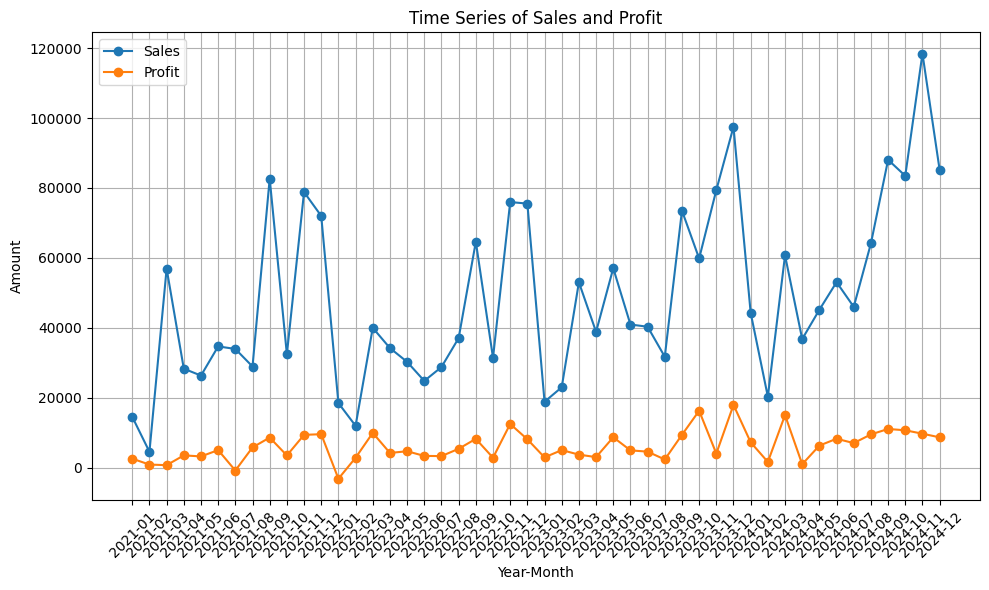

In [110]:
import matplotlib.pyplot as plt

df['Year-Month'] = df['Order Date'].dt.to_period('M')

time_series = df.groupby('Year-Month')[['Sales', 'Profit']].sum().reset_index()
time_series['Year-Month'] = time_series['Year-Month'].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(time_series['Year-Month'], time_series['Sales'], label='Sales', marker='o')
plt.plot(time_series['Year-Month'], time_series['Profit'], label='Profit', marker='o')

plt.xticks(rotation=45)
plt.title('Time Series of Sales and Profit')
plt.xlabel('Year-Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

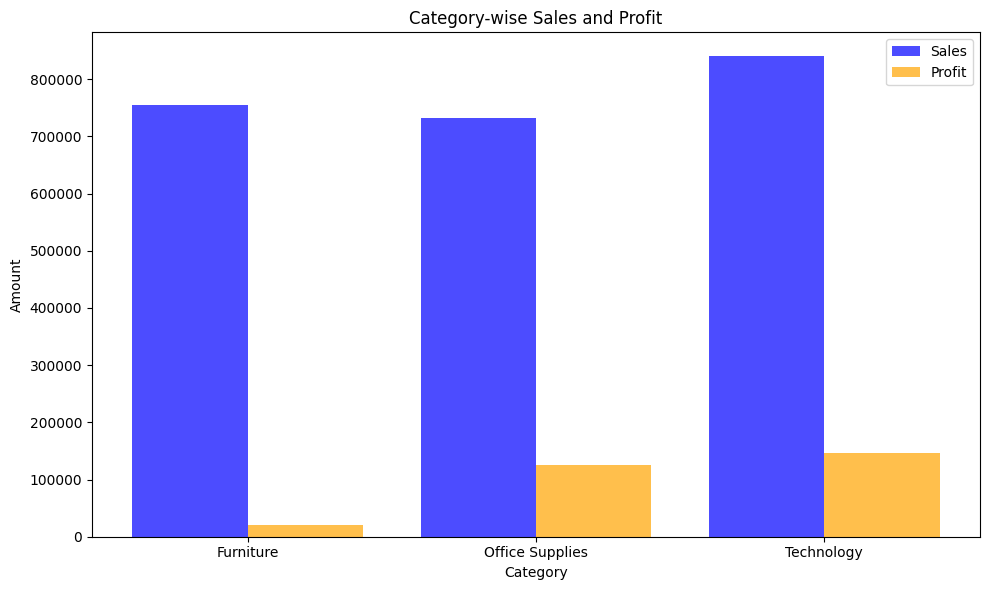

In [111]:
# Data preparation: Group by Category and sum Sales and Profit
category_sales_profit = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

# Extract data for plotting
categories = category_sales_profit['Category']
sales = category_sales_profit['Sales']
profit = category_sales_profit['Profit']

# Create positions for the bars
x = np.arange(len(categories))  # Positions for categories
bar_width = 0.4  # Width of each bar

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Sales and Profit bars side-by-side
ax.bar(x - bar_width / 2, sales, bar_width, label='Sales', color='blue', alpha=0.7)
ax.bar(x + bar_width / 2, profit, bar_width, label='Profit', color='orange', alpha=0.7)

# Add labels, title, and legend
ax.set_xlabel('Category')
ax.set_ylabel('Amount')
ax.set_title('Category-wise Sales and Profit')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

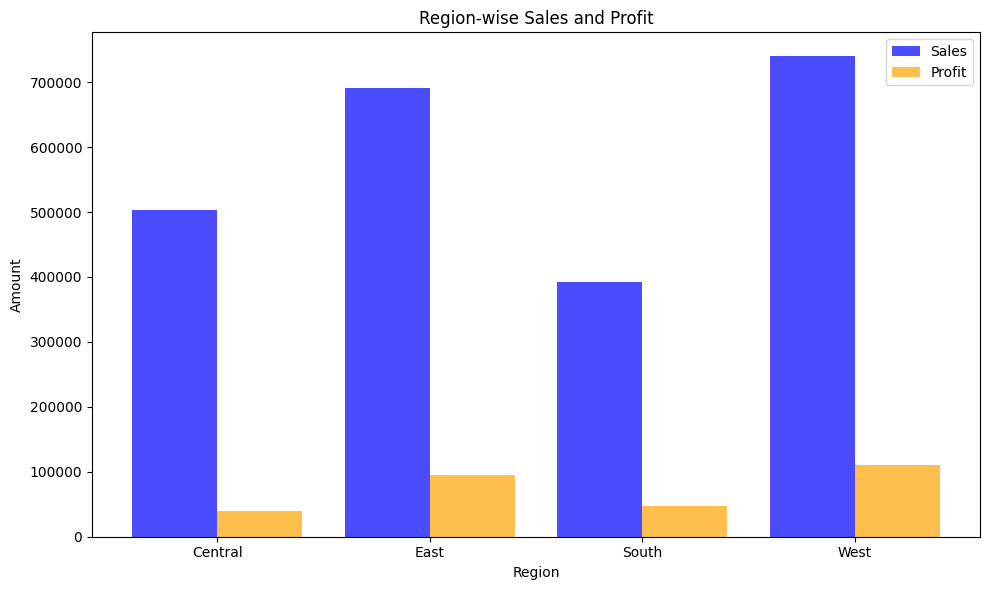

In [112]:
# Data preparation: Group by Category and sum Sales and Profit
region_sales_profit = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

# Extract data for plotting
regional = region_sales_profit['Region']
sales = region_sales_profit['Sales']
profit = region_sales_profit['Profit']

# Create positions for the bars
x = np.arange(len(regional))  # Positions for categories
bar_width = 0.4  # Width of each bar

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Sales and Profit bars side-by-side
ax.bar(x - bar_width / 2, sales, bar_width, label='Sales', color='blue', alpha=0.7)
ax.bar(x + bar_width / 2, profit, bar_width, label='Profit', color='orange', alpha=0.7)

# Add labels, title, and legend
ax.set_xlabel('Region')
ax.set_ylabel('Amount')
ax.set_title('Region-wise Sales and Profit')
ax.set_xticks(x)
ax.set_xticklabels(regional)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

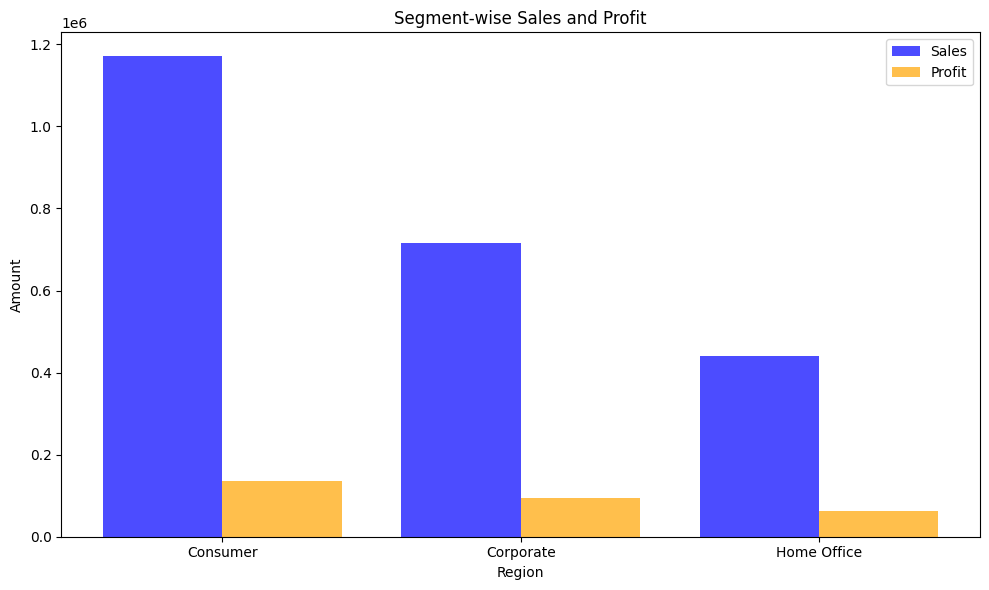

In [113]:
# Data preparation: Group by Category and sum Sales and Profit
region_sales_profit = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

# Extract data for plotting
segments = region_sales_profit['Segment']
sales = region_sales_profit['Sales']
profit = region_sales_profit['Profit']

# Create positions for the bars
x = np.arange(len(segments))  # Positions for categories
bar_width = 0.4  # Width of each bar

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Sales and Profit bars side-by-side
ax.bar(x - bar_width / 2, sales, bar_width, label='Sales', color='blue', alpha=0.7)
ax.bar(x + bar_width / 2, profit, bar_width, label='Profit', color='orange', alpha=0.7)

# Add labels, title, and legend
ax.set_xlabel('Region')
ax.set_ylabel('Amount')
ax.set_title('Segment-wise Sales and Profit')
ax.set_xticks(x)
ax.set_xticklabels(segments)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

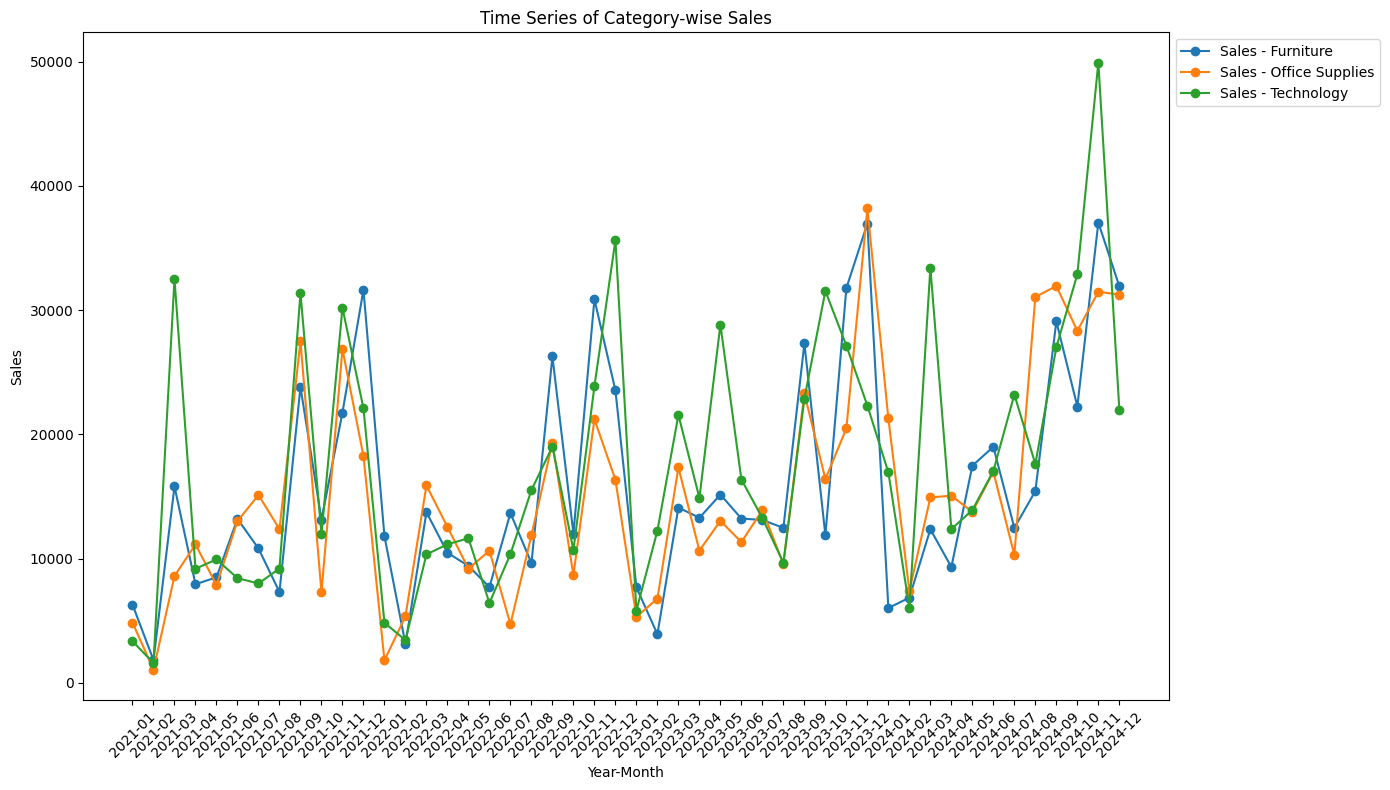

In [114]:
# Prepare the data: Group by Year-Month and Category
time_series_data = df.groupby(['Year-Month', 'Category'])[['Sales']].sum().reset_index()

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot Sales lines for each category
categories = time_series_data['Category'].unique()
for category in categories:
    category_data = time_series_data[time_series_data['Category'] == category]
    ax.plot(category_data['Year-Month'].astype(str), category_data['Sales'], label=f'Sales - {category}', marker='o')

# Customize the plot
ax.set_xlabel('Year-Month')
ax.set_ylabel('Sales')
ax.tick_params(axis='x', rotation=45)
ax.set_title('Time Series of Category-wise Sales')

# Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()

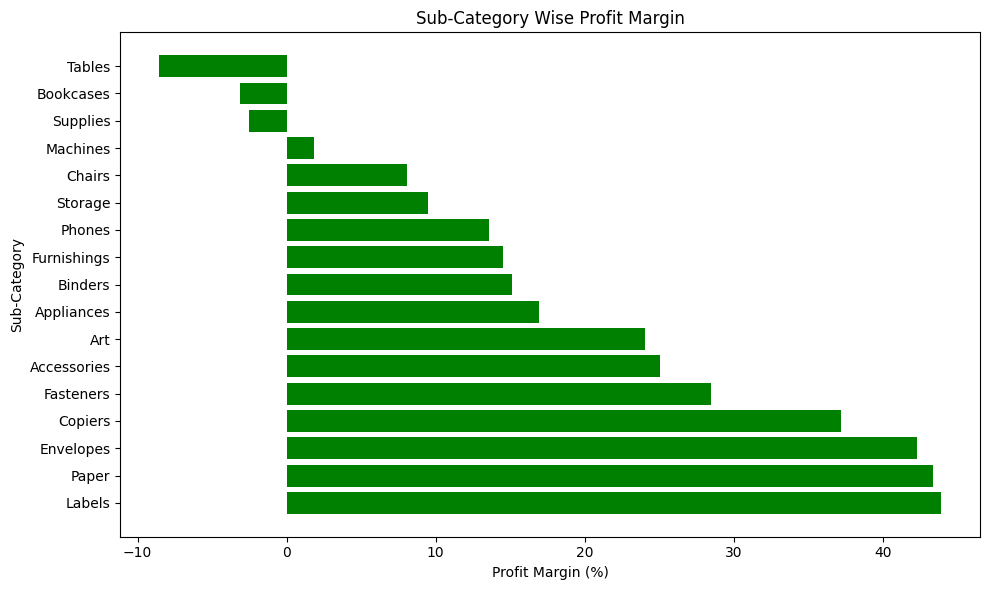

In [115]:
import matplotlib.pyplot as plt

# Group by Sub-Category and calculate total Sales and Profit
sub_category_profit = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()

# Calculate Profit Margin
sub_category_profit['Profit Margin (%)'] = (sub_category_profit['Profit'] / sub_category_profit['Sales']) * 100

sub_category_profit = sub_category_profit.sort_values('Profit Margin (%)', ascending=False)

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(sub_category_profit['Sub-Category'], sub_category_profit['Profit Margin (%)'], color='green')

# Add labels and title
plt.xlabel('Profit Margin (%)')
plt.ylabel('Sub-Category')
plt.title('Sub-Category Wise Profit Margin')

# Show plot
plt.tight_layout()
plt.show()

# Customer segmentation

In [116]:
#Hot encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Segment', 'Category']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Apply the encoder
encoded_array = encoder.fit_transform(df[categorical_features])

# Creating a DataFrame from the encoded array
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_features))

# Combining the encoded features with the original DataFrame
df_encoded = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Drop original categorical columns
df_encoded = df_encoded.drop(columns=categorical_features)

# Resulting DataFrame
print(df_encoded)


       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0           1  US-2021-103800 2021-01-03 2021-01-07  Standard Class   
1           2  US-2021-112326 2021-01-04 2021-01-08  Standard Class   
2           3  US-2021-112326 2021-01-04 2021-01-08  Standard Class   
3           4  US-2021-112326 2021-01-04 2021-01-08  Standard Class   
4           5  US-2021-141817 2021-01-05 2021-01-12  Standard Class   
...       ...             ...        ...        ...             ...   
10189   10189  US-2024-115427 2024-12-30 2025-01-03  Standard Class   
10190   10190  US-2024-143259 2024-12-30 2025-01-03  Standard Class   
10191   10191  US-2024-115427 2024-12-30 2025-01-03  Standard Class   
10192   10192  US-2024-156720 2024-12-30 2025-01-03  Standard Class   
10193   10194  CA-2024-143500 2024-12-30 2025-01-03  Standard Class   

      Customer ID      Customer Name Country/Region           City  \
0        DP-13000      Darren Powers  United States        Houston   
1      

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [117]:
df_encodedUS = df_encoded[df_encoded['Country/Region'] == "United States" ]

df_encodedUS_East = df_encodedUS[df_encodedUS['Region'] == "East"]
df_encodedUS_West = df_encodedUS[df_encodedUS['Region'] == "West"]
df_encodedUS_Central = df_encodedUS[df_encodedUS['Region'] == "Central"]
df_encodedUS_South = df_encodedUS[df_encodedUS['Region'] == "South"]

**East region**

Cluster Summary:
                Sales  Quantity       Profit
Cluster                                    
0         124.174040  2.522048     7.816975
1         385.559907  6.487150    45.699897
2        5460.346316  4.684211  1946.356700


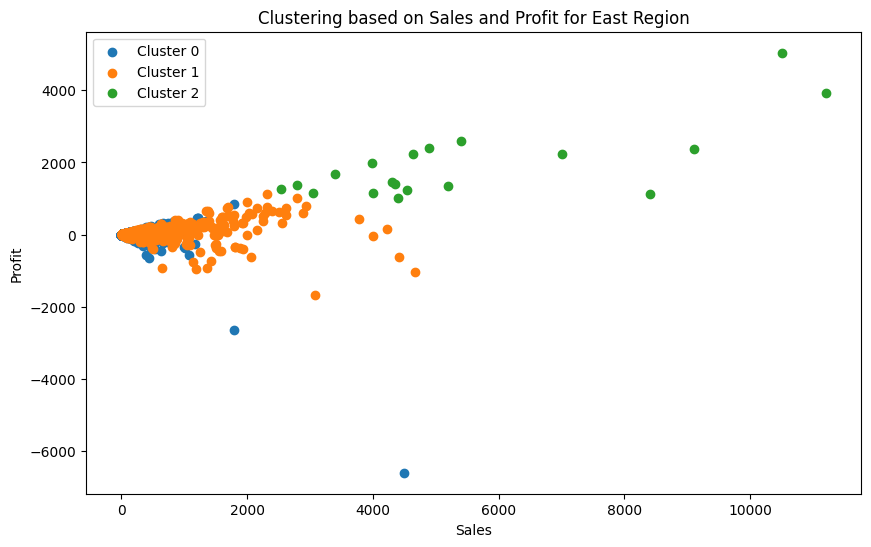

In [118]:
# Filter the data
features = df_encodedUS_East[['Sales', 'Quantity', 'Profit']]

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
from sklearn.cluster import KMeans

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)  
df_encodedUS_East = df_encodedUS_East.copy()  
df_encodedUS_East.loc[:, 'Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze clusters
cluster_summary = df_encodedUS_East.groupby('Cluster')[['Sales', 'Quantity', 'Profit']].mean()
print("Cluster Summary:\n", cluster_summary)

# Visualize clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(
        df_encodedUS_East[df_encodedUS_East['Cluster'] == cluster]['Sales'],  # x-axis: Sales
        df_encodedUS_East[df_encodedUS_East['Cluster'] == cluster]['Profit'],  # y-axis: Profit
        label=f'Cluster {cluster}'
    )

plt.title('Clustering based on Sales and Profit for East Region')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
plt.show()

**West Region**

Cluster Summary:
                 Sales  Quantity       Profit
Cluster                                     
0          554.862966  6.960526    92.464801
1          118.657662  2.855037    12.868640
2        13999.960000  4.000000  6719.980800


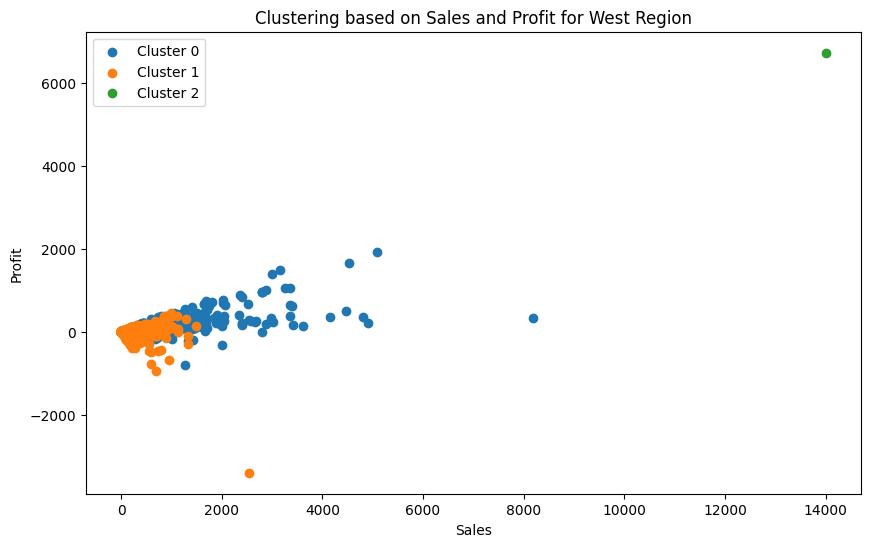

In [119]:
# Filter the data
features = df_encodedUS_West[['Sales', 'Quantity', 'Profit']]

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
from sklearn.cluster import KMeans

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)  
df_encodedUS_West = df_encodedUS_West.copy()  
df_encodedUS_West.loc[:, 'Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze clusters
cluster_summary = df_encodedUS_West.groupby('Cluster')[['Sales', 'Quantity', 'Profit']].mean()
print("Cluster Summary:\n", cluster_summary)

# Visualize clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(
        df_encodedUS_West[df_encodedUS_West['Cluster'] == cluster]['Sales'],  # x-axis: Sales
        df_encodedUS_West[df_encodedUS_West['Cluster'] == cluster]['Profit'],  # y-axis: Profit
        label=f'Cluster {cluster}'
    )

plt.title('Clustering based on Sales and Profit for West Region')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
plt.show()

**Central Region**

Cluster Summary:
                 Sales  Quantity       Profit
Cluster                                     
0          121.744931  2.548695     6.452972
1          364.667509  6.345794    15.476532
2        12280.880000  7.666667  5992.273833


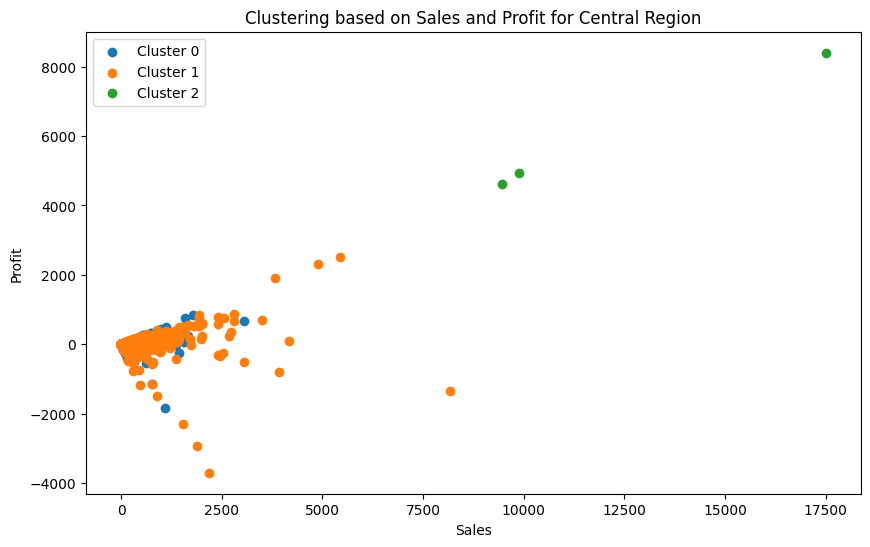

In [120]:
#Filter the data
features = df_encodedUS_Central[['Sales', 'Quantity', 'Profit']]

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
from sklearn.cluster import KMeans

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)  
df_encodedUS_Central = df_encodedUS_Central.copy()  
df_encodedUS_Central.loc[:, 'Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze clusters
cluster_summary = df_encodedUS_Central.groupby('Cluster')[['Sales', 'Quantity', 'Profit']].mean()
print("Cluster Summary:\n", cluster_summary)

# Visualize clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(
        df_encodedUS_Central[df_encodedUS_Central['Cluster'] == cluster]['Sales'],  # x-axis: Sales
        df_encodedUS_Central[df_encodedUS_Central['Cluster'] == cluster]['Profit'],  # y-axis: Profit
        label=f'Cluster {cluster}'
    )

plt.title('Clustering based on Sales and Profit for Central Region')  
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
plt.show()


**South Region**

Cluster Summary:
                 Sales  Quantity       Profit
Cluster                                     
0          542.166930  7.321429    97.019722
1          145.686155  2.917381    12.441062
2        22638.480000  6.000000 -1811.078400


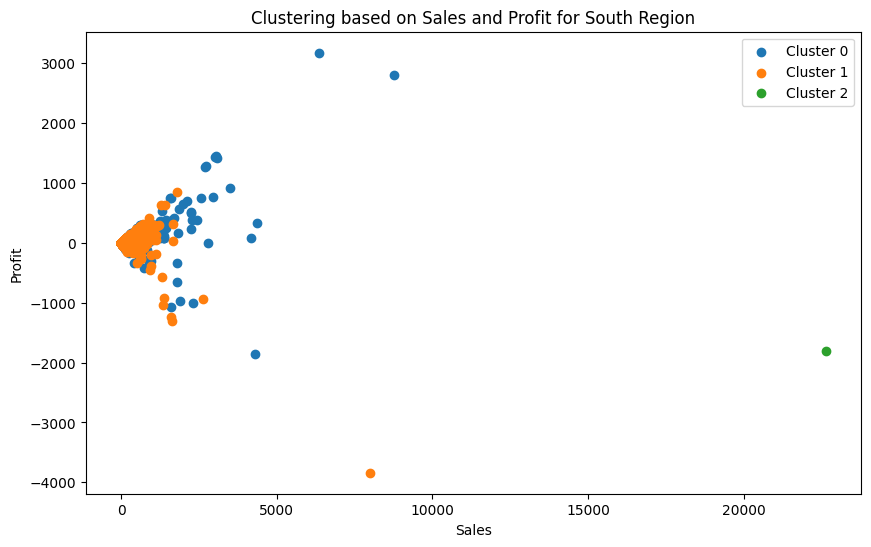

In [121]:
#Filter the data
features = df_encodedUS_South[['Sales', 'Quantity', 'Profit']]

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
from sklearn.cluster import KMeans

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)  
df_encodedUS_South = df_encodedUS_South.copy()  
df_encodedUS_South.loc[:, 'Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze clusters
cluster_summary = df_encodedUS_South.groupby('Cluster')[['Sales', 'Quantity', 'Profit']].mean()
print("Cluster Summary:\n", cluster_summary)

# Visualize clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(
        df_encodedUS_South[df_encodedUS_South['Cluster'] == cluster]['Sales'],  # x-axis: Sales
        df_encodedUS_South[df_encodedUS_South['Cluster'] == cluster]['Profit'],  # y-axis: Profit
        label=f'Cluster {cluster}'
    )

plt.title('Clustering based on Sales and Profit for South Region')  
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
plt.show()